In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

In [ ]:
SubRank_df = pd.read_excel("2023 Subway Tables.xlsx", sheet_name="Subway Rank")

In [ ]:
SubRank_df.head()

,CCYY,STAID,STATION,SEGMENT,SECTOR,BOROUGH,AVGWKDRIDER,AVGSATRIDER,AVGSUNRIDER,AVGWKND,ANN_RID,Wkdy Rank,Wknd Rank,Annual Rank,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2023.0,10,"Wall St (2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12395,5956,4832,10788,3729954,76.0,112.0,82.0,NaN,1.0,NaN,1994097.0
1,2023.0,50,Rector St (1),Broadway/7 Av (CBD),Downtown,Manhattan,4898,3770,2850,6620,1606245,209.0,181.0,202.0,NaN,1.0,NaN,NaN
2,2023.0,60,WTC Cortlandt (1),Broadway/7 Av (CBD),Downtown,Manhattan,10218,8069,5810,13879,3358064,98.0,82.0,95.0,NaN,1.0,NaN,NaN
3,2023.0,70,"Chambers St (1,2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12798,5651,4283,9934,3782605,70.0,130.0,77.0,NaN,1.0,NaN,NaN
4,2023.0,80,Franklin St (1),Broadway/7 Av (CBD),Valley,Manhattan,4337,2400,1822,4222,1329726,227.0,248.0,234.0,NaN,1.0,NaN,NaN


In [ ]:
subway_rank_df_cleaned = SubRank_df.drop(columns=['AVGSATRIDER', 'AVGSUNRIDER'])


In [ ]:
subway_rank_df_cleaned.head()


,CCYY,STAID,STATION,SEGMENT,SECTOR,BOROUGH,AVGWKDRIDER,AVGWKND,ANN_RID,Wkdy Rank,Wknd Rank,Annual Rank,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2023.0,10,"Wall St (2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12395,10788,3729954,76.0,112.0,82.0,NaN,1.0,NaN,1994097.0
1,2023.0,50,Rector St (1),Broadway/7 Av (CBD),Downtown,Manhattan,4898,6620,1606245,209.0,181.0,202.0,NaN,1.0,NaN,NaN
2,2023.0,60,WTC Cortlandt (1),Broadway/7 Av (CBD),Downtown,Manhattan,10218,13879,3358064,98.0,82.0,95.0,NaN,1.0,NaN,NaN
3,2023.0,70,"Chambers St (1,2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12798,9934,3782605,70.0,130.0,77.0,NaN,1.0,NaN,NaN
4,2023.0,80,Franklin St (1),Broadway/7 Av (CBD),Valley,Manhattan,4337,4222,1329726,227.0,248.0,234.0,NaN,1.0,NaN,NaN


In [ ]:
# Tidy the subway_rank_df by renaming columns and setting up proper indexing
subway_rank_df_tidy = subway_rank_df_cleaned.rename(columns={
    'CCYY': 'Year',
    'STAID': 'Station ID',
    'STATION': 'Station Name',
    'SEGMENT': 'Segment',
    'SECTOR': 'Sector',
    'BOROUGH': 'Borough',
    'AVGWKDRIDER': 'Avg Weekday Ridership',
    'AVGWKND': 'Avg Weekend Ridership',
    'ANN_RID': 'Annual Ridership',
    'Wkdy Rank': 'Weekday Rank',
    'Wknd Rank': 'Weekend Rank',
    'Annual Rank': 'Annual Rank'
})

# Set "Station ID" and "Year" as multi-level index
subway_rank_df_tidy.set_index(['Station ID', 'Year'], inplace=True)



In [ ]:
subway_rank_df_tidy_cleaned = subway_rank_df_tidy.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'])


In [ ]:
subway_rank_df_tidy_cleaned.head()

,,Station Name,Segment,Sector,Borough,Avg Weekday Ridership,Avg Weekend Ridership,Annual Ridership,Weekday Rank,Weekend Rank,Annual Rank
Station ID,Year,,,,,,,,,,
10,2023.0,"Wall St (2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12395,10788,3729954,76.0,112.0,82.0
50,2023.0,Rector St (1),Broadway/7 Av (CBD),Downtown,Manhattan,4898,6620,1606245,209.0,181.0,202.0
60,2023.0,WTC Cortlandt (1),Broadway/7 Av (CBD),Downtown,Manhattan,10218,13879,3358064,98.0,82.0,95.0
70,2023.0,"Chambers St (1,2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12798,9934,3782605,70.0,130.0,77.0
80,2023.0,Franklin St (1),Broadway/7 Av (CBD),Valley,Manhattan,4337,4222,1329726,227.0,248.0,234.0


In [ ]:
subway_rank_df_tidy_cleaned

,,Station Name,Segment,Sector,Borough,Avg Weekday Ridership,Avg Weekend Ridership,Annual Ridership,Weekday Rank,Weekend Rank,Annual Rank
Station ID,Year,,,,,,,,,,
10,2023.0,"Wall St (2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12395,10788,3729954,76.0,112.0,82.0
50,2023.0,Rector St (1),Broadway/7 Av (CBD),Downtown,Manhattan,4898,6620,1606245,209.0,181.0,202.0
60,2023.0,WTC Cortlandt (1),Broadway/7 Av (CBD),Downtown,Manhattan,10218,13879,3358064,98.0,82.0,95.0
70,2023.0,"Chambers St (1,2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12798,9934,3782605,70.0,130.0,77.0
80,2023.0,Franklin St (1),Broadway/7 Av (CBD),Valley,Manhattan,4337,4222,1329726,227.0,248.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...
5160,2023.0,"Court Sq (E,G,M,7)",Queens Transfer,Queens,Queens,17116,19041,5381184,47.0,46.0,48.0
5170,2023.0,"Sutphin Blvd-Archer Av-JFK Airport (E,J,Z)",Queens Transfer,Queens,Queens,19068,19819,5941974,35.0,43.0,34.0
5180,2023.0,"Jamaica Center-Parsons-Archer (E,J,Z)",Queens Transfer,Queens,Queens,19529,13750,5715839,33.0,85.0,39.0


In [ ]:
subway_rank_df_tidy_cleaned_dropped = subway_rank_df_tidy_cleaned.dropna()


In [ ]:
subway_rank_df_tidy_cleaned_dropped

,,Station Name,Segment,Sector,Borough,Avg Weekday Ridership,Avg Weekend Ridership,Annual Ridership,Weekday Rank,Weekend Rank,Annual Rank
Station ID,Year,,,,,,,,,,
10,2023.0,"Wall St (2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12395,10788,3729954,76.0,112.0,82.0
50,2023.0,Rector St (1),Broadway/7 Av (CBD),Downtown,Manhattan,4898,6620,1606245,209.0,181.0,202.0
60,2023.0,WTC Cortlandt (1),Broadway/7 Av (CBD),Downtown,Manhattan,10218,13879,3358064,98.0,82.0,95.0
70,2023.0,"Chambers St (1,2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12798,9934,3782605,70.0,130.0,77.0
80,2023.0,Franklin St (1),Broadway/7 Av (CBD),Valley,Manhattan,4337,4222,1329726,227.0,248.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...
5150,2023.0,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",Queens Transfer,Queens,Queens,43672,59507,14348691,9.0,8.0,9.0
5160,2023.0,"Court Sq (E,G,M,7)",Queens Transfer,Queens,Queens,17116,19041,5381184,47.0,46.0,48.0
5170,2023.0,"Sutphin Blvd-Archer Av-JFK Airport (E,J,Z)",Queens Transfer,Queens,Queens,19068,19819,5941974,35.0,43.0,34.0


In [ ]:
# Tidy the dataframe: rename columns for better readability and drop unnecessary columns
subway_rank_df_tidy = subway_rank_df_cleaned.rename(columns={
    'CCYY': 'Year',
    'STAID': 'Station_ID',
    'STATION': 'Station Name',
    'SEGMENT': 'Segment',
    'SECTOR': 'Sector',
    'BOROUGH': 'Borough',
    'AVGWKDRIDER': 'Avg_Weekday_Ridership',
    'AVGWKND': 'Avg_Weekend_Ridership',
    'ANN_RID': 'Annual_Ridership',
    'Wkdy Rank': 'Weekday_Rank',
    'Wknd Rank': 'Weekend_Rank',
    'Annual Rank': 'Annual_Rank'
})

# Drop columns that are either not needed or have many missing values
subway_rank_df_tidy = subway_rank_df_tidy.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'])

# Display the first few rows of the tidy dataframe
subway_rank_df_tidy.head()


,Year,Station_ID,Station Name,Segment,Sector,Borough,Avg_Weekday_Ridership,Avg_Weekend_Ridership,Annual_Ridership,Weekday_Rank,Weekend_Rank,Annual_Rank
0,2023.0,10,"Wall St (2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12395,10788,3729954,76.0,112.0,82.0
1,2023.0,50,Rector St (1),Broadway/7 Av (CBD),Downtown,Manhattan,4898,6620,1606245,209.0,181.0,202.0
2,2023.0,60,WTC Cortlandt (1),Broadway/7 Av (CBD),Downtown,Manhattan,10218,13879,3358064,98.0,82.0,95.0
3,2023.0,70,"Chambers St (1,2,3)",Broadway/7 Av (CBD),Downtown,Manhattan,12798,9934,3782605,70.0,130.0,77.0
4,2023.0,80,Franklin St (1),Broadway/7 Av (CBD),Valley,Manhattan,4337,4222,1329726,227.0,248.0,234.0


In [ ]:
Avg_WD_df = pd.read_excel("2023 Subway Tables.xlsx", sheet_name="Avg Weekday")

In [ ]:
Avg_WD_df

,Average Weekday Subway Ridership,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Station (alphabetical by borough),*,Boro,2018.0,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03,2023.0,2022-2023 Change,NaN,2023 Rank
1,The Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"138 St-Grand Concourse (4,5)",1,Bx,3166.0,3.324000e+03,1.211274e+03,2.126664e+03,2.519480e+03,2546.0,26.5197,0.010526,336
3,"149 St-Grand Concourse (2,4,5)",NaN,Bx,13081.0,1.295976e+04,5.813577e+03,5.873241e+03,6.599866e+03,6789.0,189.1339,0.028657,154
4,"161 St-Yankee Stadium (B,D,4)",NaN,Bx,26034.0,2.564217e+04,1.011193e+04,1.237403e+04,1.522979e+04,16043.0,813.2087,0.053396,54
...,...,...,...,...,...,...,...,...,...,...,...,...
432,Queens,NaN,NaN,755778.0,7.628796e+05,3.211927e+05,3.847267e+05,4.878465e+05,545545.0,57698.4608,0.118272,NaN
433,Systemwide Adjustment,NaN,NaN,366.0,-1.700000e+01,NaN,NaN,NaN,NaN,0,NaN,NaN
434,Total,NaN,NaN,5437969.0,5.493858e+06,2.040580e+06,2.369655e+06,3.189904e+06,3625326.0,435422.4689,0.136500,NaN
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Clean the 'Avg Weekday' sheet by renaming columns and dropping unnecessary rows/columns
avg_weekday_cleaned_df = Avg_WD_df.rename(columns={
    'Average Weekday Subway Ridership': 'Station Name',
    'Unnamed: 1': 'Placeholder',
    'Unnamed: 2': 'Borough',
    'Unnamed: 3': '2018',
    'Unnamed: 4': '2019',
    'Unnamed: 5': '2020',
    'Unnamed: 6': '2021',
    'Unnamed: 7': '2022',
    'Unnamed: 8': '2023',
    'Unnamed: 9': '2022-2023 Change',
    'Unnamed: 10': 'Growth Rate',
    'Unnamed: 11': '2023 Rank'
})

# Remove the first row (header) which contains non-useful data and reset the index
avg_weekday_cleaned_df = avg_weekday_cleaned_df.drop(index=0).reset_index(drop=True)

# Drop columns that are unnecessary, like 'Placeholder'
avg_weekday_cleaned_df = avg_weekday_cleaned_df.drop(columns=['Placeholder'])

# Convert the ridership and change columns to numeric types for analysis
columns_to_convert = ['2018', '2019', '2020', '2021',
                      '2022', '2023', '2022-2023 Change']
avg_weekday_cleaned_df[columns_to_convert] = avg_weekday_cleaned_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the cleaned data
avg_weekday_cleaned_df

,Station Name,Borough,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank
0,The Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"138 St-Grand Concourse (4,5)",Bx,3166.0,3.324000e+03,1.211274e+03,2.126664e+03,2.519480e+03,2546.0,26.5197,0.010526,336
2,"149 St-Grand Concourse (2,4,5)",Bx,13081.0,1.295976e+04,5.813577e+03,5.873241e+03,6.599866e+03,6789.0,189.1339,0.028657,154
3,"161 St-Yankee Stadium (B,D,4)",Bx,26034.0,2.564217e+04,1.011193e+04,1.237403e+04,1.522979e+04,16043.0,813.2087,0.053396,54
4,167 St (4),Bx,9398.0,8.485630e+03,4.357071e+03,5.065877e+03,5.766468e+03,5807.0,40.5315,0.007029,175
...,...,...,...,...,...,...,...,...,...,...,...
431,Queens,NaN,755778.0,7.628796e+05,3.211927e+05,3.847267e+05,4.878465e+05,545545.0,57698.4608,0.118272,NaN
432,Systemwide Adjustment,NaN,366.0,-1.700000e+01,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
433,Total,NaN,5437969.0,5.493858e+06,2.040580e+06,2.369655e+06,3.189904e+06,3625326.0,435422.4689,0.136500,NaN
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
avg_weekday_cleaned_df

,Station Name,Borough,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank
0,The Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"138 St-Grand Concourse (4,5)",Bx,3166.0,3.324000e+03,1.211274e+03,2.126664e+03,2.519480e+03,2546.0,26.5197,0.010526,336
2,"149 St-Grand Concourse (2,4,5)",Bx,13081.0,1.295976e+04,5.813577e+03,5.873241e+03,6.599866e+03,6789.0,189.1339,0.028657,154
3,"161 St-Yankee Stadium (B,D,4)",Bx,26034.0,2.564217e+04,1.011193e+04,1.237403e+04,1.522979e+04,16043.0,813.2087,0.053396,54
4,167 St (4),Bx,9398.0,8.485630e+03,4.357071e+03,5.065877e+03,5.766468e+03,5807.0,40.5315,0.007029,175
...,...,...,...,...,...,...,...,...,...,...,...
431,Queens,NaN,755778.0,7.628796e+05,3.211927e+05,3.847267e+05,4.878465e+05,545545.0,57698.4608,0.118272,NaN
432,Systemwide Adjustment,NaN,366.0,-1.700000e+01,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
433,Total,NaN,5437969.0,5.493858e+06,2.040580e+06,2.369655e+06,3.189904e+06,3625326.0,435422.4689,0.136500,NaN
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Tidy the data by melting it into long format
avg_weekday_cleaned_df_tidy = avg_weekday_cleaned_df.melt(
    id_vars=['Station Name', 'Borough'],
    value_vars=['2018', '2019', '2020', '2021', '2022', '2023'],
    var_name='Year', value_name='Ridership'
)

# Display the tidy data to the user
avg_weekday_cleaned_df_tidy

,Station Name,Borough,Year,Ridership
0,The Bronx,NaN,2018,NaN
1,"138 St-Grand Concourse (4,5)",Bx,2018,3166.0
2,"149 St-Grand Concourse (2,4,5)",Bx,2018,13081.0
3,"161 St-Yankee Stadium (B,D,4)",Bx,2018,26034.0
4,167 St (4),Bx,2018,9398.0
...,...,...,...,...
2611,Queens,NaN,2023,545545.0
2612,Systemwide Adjustment,NaN,2023,NaN
2613,Total,NaN,2023,3625326.0
2614,NaN,NaN,2023,NaN


In [ ]:
Avg_Wknd_df = pd.read_excel("2023 Subway Tables.xlsx", sheet_name="Avg Wkend")

In [ ]:
Avg_Wknd_df

,Average Weekend (Saturday + Sunday) Subway Ridership,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Station (alphabetical by borough),*,Boro,2018.0,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03,2023.0,2022-2023 Change,NaN,2023 Rank,NaN,NaN,NaN
1,The Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"138 St-Grand Concourse (4,5)",1,Bx,2557.0,3.537365e+03,1.135848e+03,2.127647e+03,2.316609e+03,2550.0,233.391,0.100747,336,NaN,NaN,NaN
3,"149 St-Grand Concourse (2,4,5)",NaN,Bx,11873.0,1.164673e+04,6.027974e+03,6.237059e+03,6.380611e+03,6683.0,302.3891,0.047392,154,NaN,NaN,NaN
4,"161 St-Yankee Stadium (B,D,4)",NaN,Bx,32173.0,3.162692e+04,1.155819e+04,1.677563e+04,2.123350e+04,22932.0,1698.4962,0.079991,54,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Queens,NaN,NaN,764327.0,7.680596e+05,3.371698e+05,4.399431e+05,5.319031e+05,592961.0,61057.855,0.114791,NaN,NaN,NaN,NaN
433,Systemwide Adjustment,NaN,NaN,-156.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
434,System Total,NaN,NaN,5438947.0,5.494195e+06,2.135312e+06,2.888620e+06,3.703485e+06,4237295.0,533810.216,0.144137,NaN,NaN,NaN,NaN
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Clean the 'Avg Wkend' sheet by renaming columns and removing unnecessary rows/columns
avg_weekend_cleaned_df = Avg_Wknd_df.rename(columns={
    'Average Weekend (Saturday + Sunday) Subway Ridership': 'Station Name',
    'Unnamed: 1': 'Placeholder',
    'Unnamed: 2': 'Borough',
    'Unnamed: 3': '2018',
    'Unnamed: 4': '2019',
    'Unnamed: 5': '2020',
    'Unnamed: 6': '2021',
    'Unnamed: 7': '2022',
    'Unnamed: 8': '2023',
    'Unnamed: 9': '2022-2023 Change',
    'Unnamed: 10': 'Growth Rate',
    'Unnamed: 11': '2023 Rank'
})

# Remove the first row (header) and reset the index
avg_weekend_cleaned_df = avg_weekend_cleaned_df.drop(index=0).reset_index(drop=True)

# Drop the 'Placeholder' column which is not necessary
avg_weekend_cleaned_df = avg_weekend_cleaned_df.drop(columns=['Placeholder'])

# Convert the ridership and change columns to numeric types for analysis
columns_to_convert = ['2018', '2019', '2020', '2021',
                      '2022', '2023', '2022-2023 Change']
avg_weekend_cleaned_df[columns_to_convert] = avg_weekend_cleaned_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the cleaned data
avg_weekend_cleaned_df

,Station Name,Borough,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,The Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"138 St-Grand Concourse (4,5)",Bx,2557.0,3.537365e+03,1.135848e+03,2.127647e+03,2.316609e+03,2550.0,233.3910,0.100747,336,NaN,NaN,NaN
2,"149 St-Grand Concourse (2,4,5)",Bx,11873.0,1.164673e+04,6.027974e+03,6.237059e+03,6.380611e+03,6683.0,302.3891,0.047392,154,NaN,NaN,NaN
3,"161 St-Yankee Stadium (B,D,4)",Bx,32173.0,3.162692e+04,1.155819e+04,1.677563e+04,2.123350e+04,22932.0,1698.4962,0.079991,54,NaN,NaN,NaN
4,167 St (4),Bx,9822.0,8.985923e+03,5.111658e+03,5.955706e+03,6.944960e+03,7819.0,874.0403,0.125852,175,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,Queens,NaN,764327.0,7.680596e+05,3.371698e+05,4.399431e+05,5.319031e+05,592961.0,61057.8550,0.114791,NaN,NaN,NaN,NaN
432,Systemwide Adjustment,NaN,-156.0,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
433,System Total,NaN,5438947.0,5.494195e+06,2.135312e+06,2.888620e+06,3.703485e+06,4237295.0,533810.2160,0.144137,NaN,NaN,NaN,NaN
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
avg_weekend_cleaned_df = avg_weekend_cleaned_df.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])


In [ ]:
avg_weekend_cleaned_df

,Station Name,Borough,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank
0,The Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"138 St-Grand Concourse (4,5)",Bx,2557.0,3.537365e+03,1.135848e+03,2.127647e+03,2.316609e+03,2550.0,233.3910,0.100747,336
2,"149 St-Grand Concourse (2,4,5)",Bx,11873.0,1.164673e+04,6.027974e+03,6.237059e+03,6.380611e+03,6683.0,302.3891,0.047392,154
3,"161 St-Yankee Stadium (B,D,4)",Bx,32173.0,3.162692e+04,1.155819e+04,1.677563e+04,2.123350e+04,22932.0,1698.4962,0.079991,54
4,167 St (4),Bx,9822.0,8.985923e+03,5.111658e+03,5.955706e+03,6.944960e+03,7819.0,874.0403,0.125852,175
...,...,...,...,...,...,...,...,...,...,...,...
431,Queens,NaN,764327.0,7.680596e+05,3.371698e+05,4.399431e+05,5.319031e+05,592961.0,61057.8550,0.114791,NaN
432,Systemwide Adjustment,NaN,-156.0,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
433,System Total,NaN,5438947.0,5.494195e+06,2.135312e+06,2.888620e+06,3.703485e+06,4237295.0,533810.2160,0.144137,NaN
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Tidy the data by melting it into long format
avg_weekend_cleaned_df_year_tidy = avg_weekend_cleaned_df.melt(
    id_vars=['Station Name', 'Borough'],
    value_vars=['2018', '2019', '2020', '2021', '2022', '2023'],
    var_name='Year', value_name='Ridership'
)

# Display the tidy data to the user
avg_weekend_cleaned_df_year_tidy

,Station Name,Borough,Year,Ridership
0,The Bronx,NaN,2018,NaN
1,"138 St-Grand Concourse (4,5)",Bx,2018,2557.0
2,"149 St-Grand Concourse (2,4,5)",Bx,2018,11873.0
3,"161 St-Yankee Stadium (B,D,4)",Bx,2018,32173.0
4,167 St (4),Bx,2018,9822.0
...,...,...,...,...
2611,Queens,NaN,2023,592961.0
2612,Systemwide Adjustment,NaN,2023,NaN
2613,System Total,NaN,2023,4237295.0
2614,NaN,NaN,2023,NaN


In [ ]:
Annual_df = pd.read_excel("2023 Subway Tables.xlsx", sheet_name="Annual Total")

In [ ]:
Annual_df

,Annual Subway Ridership,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Station (alphabetical by borough),*,Boro,2.018000e+03,2.019000e+03,2.020000e+03,2021.0,2.022000e+03,2.023000e+03,2022-2023 Change,NaN,2023 Rank
1,The Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"138 St-Grand Concourse (4,5)",1,Bx,9.445980e+05,1.035878e+06,3.714080e+05,656866.0,7.666100e+05,7.852710e+05,18661,0.024342,336
3,"149 St-Grand Concourse (2,4,5)",NaN,Bx,3.972763e+06,3.931908e+06,1.815785e+06,1832521.0,2.026363e+06,2.087779e+06,61416,0.030308,154
4,"161 St-Yankee Stadium (B,D,4)",NaN,Bx,8.392290e+06,8.254928e+06,3.221651e+06,4077604.0,5.023193e+06,5.316351e+06,293158,0.058361,54
...,...,...,...,...,...,...,...,...,...,...,...,...
432,Queens,NaN,NaN,2.340858e+08,2.361497e+08,1.007038e+08,121918793.0,1.532272e+08,1.710290e+08,17801856,0.116180,NaN
433,Systemwide Adjustment,NaN,NaN,-1.257900e+04,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
434,System Total,NaN,NaN,1.680060e+09,1.697787e+09,6.395410e+08,759976721.0,1.013425e+09,1.151998e+09,138572693,0.136737,NaN
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Clean the 'Annual Total' sheet by renaming columns and removing unnecessary rows/columns
annual_total_cleaned_df = Annual_df.rename(columns={
    'Annual Subway Ridership': 'Station Name',
    'Unnamed: 1': 'Placeholder',
    'Unnamed: 2': 'Borough',
    'Unnamed: 3': '2018',
    'Unnamed: 4': '2019',
    'Unnamed: 5': '2020',
    'Unnamed: 6': '2021',
    'Unnamed: 7': '2022',
    'Unnamed: 8': '2023',
    'Unnamed: 9': '2022-2023 Change',
    'Unnamed: 10': 'Growth Rate',
    'Unnamed: 11': '2023 Rank'
})

# Remove the first row (header) and reset the index
annual_total_cleaned_df = annual_total_cleaned_df.drop(index=0).reset_index(drop=True)

# Drop the 'Placeholder' column which is not necessary
annual_total_cleaned_df = annual_total_cleaned_df.drop(columns=['Placeholder'])

# Convert the ridership and change columns to numeric types for analysis
columns_to_convert = ['2018', '2019', '2020', '2021', '2022', '2023', '2022-2023 Change']
annual_total_cleaned_df[columns_to_convert] = annual_total_cleaned_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the cleaned data
annual_total_cleaned_df

,Station Name,Borough,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank
0,The Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"138 St-Grand Concourse (4,5)",Bx,9.445980e+05,1.035878e+06,3.714080e+05,656866.0,7.666100e+05,7.852710e+05,18661.0,0.024342,336
2,"149 St-Grand Concourse (2,4,5)",Bx,3.972763e+06,3.931908e+06,1.815785e+06,1832521.0,2.026363e+06,2.087779e+06,61416.0,0.030308,154
3,"161 St-Yankee Stadium (B,D,4)",Bx,8.392290e+06,8.254928e+06,3.221651e+06,4077604.0,5.023193e+06,5.316351e+06,293158.0,0.058361,54
4,167 St (4),Bx,2.933140e+06,2.653237e+06,1.396287e+06,1615072.0,1.847368e+06,1.901393e+06,54025.0,0.029244,175
...,...,...,...,...,...,...,...,...,...,...,...
431,Queens,NaN,2.340858e+08,2.361497e+08,1.007038e+08,121918793.0,1.532272e+08,1.710290e+08,17801856.0,0.116180,NaN
432,Systemwide Adjustment,NaN,-1.257900e+04,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
433,System Total,NaN,1.680060e+09,1.697787e+09,6.395410e+08,759976721.0,1.013425e+09,1.151998e+09,138572693.0,0.136737,NaN
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
annual_total_cleaned_df_tidy = annual_total_cleaned_df.melt(
    id_vars=['Station Name', 'Borough'],
    value_vars=['2018', '2019', '2020', '2021', '2022', '2023'],
    var_name='Year', value_name='Annual Ridership'
)

In [ ]:
annual_total_cleaned_df_tidy

,Station Name,Borough,Year,Annual Ridership
0,The Bronx,NaN,2018,NaN
1,"138 St-Grand Concourse (4,5)",Bx,2018,9.445980e+05
2,"149 St-Grand Concourse (2,4,5)",Bx,2018,3.972763e+06
3,"161 St-Yankee Stadium (B,D,4)",Bx,2018,8.392290e+06
4,167 St (4),Bx,2018,2.933140e+06
...,...,...,...,...
2611,Queens,NaN,2023,1.710290e+08
2612,Systemwide Adjustment,NaN,2023,NaN
2613,System Total,NaN,2023,1.151998e+09
2614,NaN,NaN,2023,NaN


In [ ]:
closures_df = pd.read_excel("2023 Subway Tables.xlsx", sheet_name="Closures")

In [ ]:
closures_df

,"MTA New York City Transit Temporary Station Closings, 2018-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Number,Boro,Segment,Station,Full Station,Direction,Closed,Opened
1,1,Bx,Lexington Av. (Non-CBD),"138 St-Grand Concourse (4,5)","138 St-Grand Concourse (4,5)",Bronx-bound,2019-11-18 00:00:00,2020-03-30 00:00:00
2,1,Bx,Lexington Av. (Non-CBD),"138 St-Grand Concourse (4,5)","138 St-Grand Concourse (4,5)",Manhattan-bound,2020-04-27 00:00:00,2020-07-27 00:00:00
3,2,Bx,Concourse,"167 St (B,D)","167 St (B,D)",Both,2018-08-27 00:00:00,2019-01-09 00:00:00
4,3,Bx,Concourse,"174-175 Sts (B,D)","174-175 Sts (B,D)",Both,2018-08-13 00:00:00,2018-12-26 00:00:00
5,4,Bx,Upper Broadway,238 St (1),238 St (1),Both,2018-09-04 00:00:00,2019-01-02 00:00:00
6,5,Bx,Dyre Av,Gun Hill Rd (5),Gun Hill Rd (5),Dyre Av-bound,2019-03-01 00:00:00,2019-08-31 00:00:00
7,5,Bx,Dyre Av,Gun Hill Rd (5),Gun Hill Rd (5),Manhattan-bound,2019-09-14 00:00:00,2020-03-30 00:00:00
8,6,Bx,Pelham,Longwood Av (6),Longwood Av (6),Manhattan-bound,2020-02-03 00:00:00,2020-04-10 00:00:00
9,7,Bx,Concourse,Norwood-205 St (D),Norwood-205 St (D),Manhattan-bound,2023-07-31 00:00:00,2023-08-28 00:00:00


In [ ]:
closures_clean_df = closures_df.rename(columns={
    'MTA New York City Transit Temporary Station Closings, 2018-2023': 'Number',
    'Unnamed: 1': 'Borough',
    'Unnamed: 2': 'Segment',
    'Unnamed: 3': 'Station Name',
    'Unnamed: 4': 'Full Station',
    'Unnamed: 5': 'Direction',
    'Unnamed: 6': 'Closed',
    'Unnamed: 7': 'Opened',
})

closures_clean_df = closures_clean_df.drop(index=0).reset_index(drop=True)


In [ ]:
closures_clean_df.head()

,Number,Borough,Segment,Station Name,Full Station,Direction,Closed,Opened
0,1,Bx,Lexington Av. (Non-CBD),"138 St-Grand Concourse (4,5)","138 St-Grand Concourse (4,5)",Bronx-bound,2019-11-18 00:00:00,2020-03-30 00:00:00
1,1,Bx,Lexington Av. (Non-CBD),"138 St-Grand Concourse (4,5)","138 St-Grand Concourse (4,5)",Manhattan-bound,2020-04-27 00:00:00,2020-07-27 00:00:00
2,2,Bx,Concourse,"167 St (B,D)","167 St (B,D)",Both,2018-08-27 00:00:00,2019-01-09 00:00:00
3,3,Bx,Concourse,"174-175 Sts (B,D)","174-175 Sts (B,D)",Both,2018-08-13 00:00:00,2018-12-26 00:00:00
4,4,Bx,Upper Broadway,238 St (1),238 St (1),Both,2018-09-04 00:00:00,2019-01-02 00:00:00


In [ ]:
# Tidy the cleaned 'Closures' data by melting it into long format
closures_clean_tidy_df = closures_clean_df.melt(
    id_vars=['Number', 'Borough', 'Segment', 'Station Name', 'Full Station', 'Direction'],
    value_vars=['Closed', 'Opened'],
    var_name='Closure Status', value_name='Date'
)

# Display the tidied data to the user
closures_clean_tidy_df

,Number,Borough,Segment,Station Name,Full Station,Direction,Closure Status,Date
0,1,Bx,Lexington Av. (Non-CBD),"138 St-Grand Concourse (4,5)","138 St-Grand Concourse (4,5)",Bronx-bound,Closed,2019-11-18
1,1,Bx,Lexington Av. (Non-CBD),"138 St-Grand Concourse (4,5)","138 St-Grand Concourse (4,5)",Manhattan-bound,Closed,2020-04-27
2,2,Bx,Concourse,"167 St (B,D)","167 St (B,D)",Both,Closed,2018-08-27
3,3,Bx,Concourse,"174-175 Sts (B,D)","174-175 Sts (B,D)",Both,Closed,2018-08-13
4,4,Bx,Upper Broadway,238 St (1),238 St (1),Both,Closed,2018-09-04
...,...,...,...,...,...,...,...,...
101,44,Q,Jamaica,"75 St-Elderts Ln (J,Z)","75 St-Elderts Ln (J,Z)",Manhattan-bound,Opened,2024-12-01
102,45,Q,Flushing (Queens),82 St-Jackson Hts (7),82 St-Jackson Hts (7),Manhattan-bound,Opened,2024-04-01
103,46,Q,Astoria,"Astoria Blvd (N,W)","Astoria Blvd (N,W)",Both,Opened,2019-12-19
104,47,Q,Astoria,"Broadway (N,W)","Broadway (N,W)",Both,Opened,2019-01-24


In [ ]:
# Drop the 'Full Station' column from the 'Closures' tidy dataframe
closures_tidy_df_cleaned = closures_clean_tidy_df.drop(columns=['Full Station'])

# Display the cleaned closures dataframe to the user
closures_tidy_df_cleaned

,Number,Borough,Segment,Station Name,Direction,Closure Status,Date
0,1,Bx,Lexington Av. (Non-CBD),"138 St-Grand Concourse (4,5)",Bronx-bound,Closed,2019-11-18
1,1,Bx,Lexington Av. (Non-CBD),"138 St-Grand Concourse (4,5)",Manhattan-bound,Closed,2020-04-27
2,2,Bx,Concourse,"167 St (B,D)",Both,Closed,2018-08-27
3,3,Bx,Concourse,"174-175 Sts (B,D)",Both,Closed,2018-08-13
4,4,Bx,Upper Broadway,238 St (1),Both,Closed,2018-09-04
...,...,...,...,...,...,...,...
101,44,Q,Jamaica,"75 St-Elderts Ln (J,Z)",Manhattan-bound,Opened,2024-12-01
102,45,Q,Flushing (Queens),82 St-Jackson Hts (7),Manhattan-bound,Opened,2024-04-01
103,46,Q,Astoria,"Astoria Blvd (N,W)",Both,Opened,2019-12-19
104,47,Q,Astoria,"Broadway (N,W)",Both,Opened,2019-01-24


In [ ]:
# First, we need to merge all the tidy dataframes into one dataframe.

# Assuming the tidy versions of the dataframes are stored in the following variables:
# avg_weekday_tidy_df, avg_weekend_tidy_df, annual_total_tidy_df, closures_tidy_df, subway_rank_tidy_df

# For demonstration, let's proceed with merging the dataframes.
# We will merge them step-by-step based on their common columns.

# Merge 'Avg Weekday' and 'Avg Weekend' data
merged_df = pd.merge(avg_weekday_cleaned_df_tidy, avg_weekend_cleaned_df_year_tidy,
                     on=['Station Name', 'Borough', 'Year'], how='outer', suffixes=('_Weekday', '_Weekend'))

# Merge the result with 'Annual Total' data
merged_df = pd.merge(merged_df, annual_total_cleaned_df_tidy,
                     on=['Station Name', 'Borough', 'Year'], how='outer')


# Merge with 'Closures' data
merged_df = pd.merge(merged_df, closures_tidy_df_cleaned,
                     on=['Station Name', 'Borough'], how='outer')

# Merge with 'Subway Rank' data
merged_df = pd.merge(merged_df, subway_rank_df_tidy,
                     on=['Station Name', 'Borough'], how='outer')

# Display the merged dataframe
merged_df

,Station Name,Borough,Year_x,Ridership_Weekday,Ridership_Weekend,Annual Ridership,Number,Segment_x,Direction,Closure Status,Date,Year_y,Station_ID,Segment_y,Sector,Avg_Weekday_Ridership,Avg_Weekend_Ridership,Annual_Ridership,Weekday_Rank,Weekend_Rank,Annual_Rank
0,* MTA New York City Transit Temporary Station ...,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,* MTA New York City Transit Temporary Station ...,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,* MTA New York City Transit Temporary Station ...,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,* MTA New York City Transit Temporary Station ...,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,* MTA New York City Transit Temporary Station ...,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,424.0,NaN,NaN,3625326.0,4237295.0,1.151998e+09,NaN,NaN,NaN
3426,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,424.0,NaN,NaN,3625326.0,4237295.0,1.151998e+09,NaN,NaN,NaN
3427,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,424.0,NaN,NaN,3625326.0,4237295.0,1.151998e+09,NaN,NaN,NaN
3428,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,424.0,NaN,NaN,3625326.0,4237295.0,1.151998e+09,NaN,NaN,NaN


In [ ]:
merged_df_cleaned = merged_df.dropna(subset=['Station Name', 'Borough'])


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


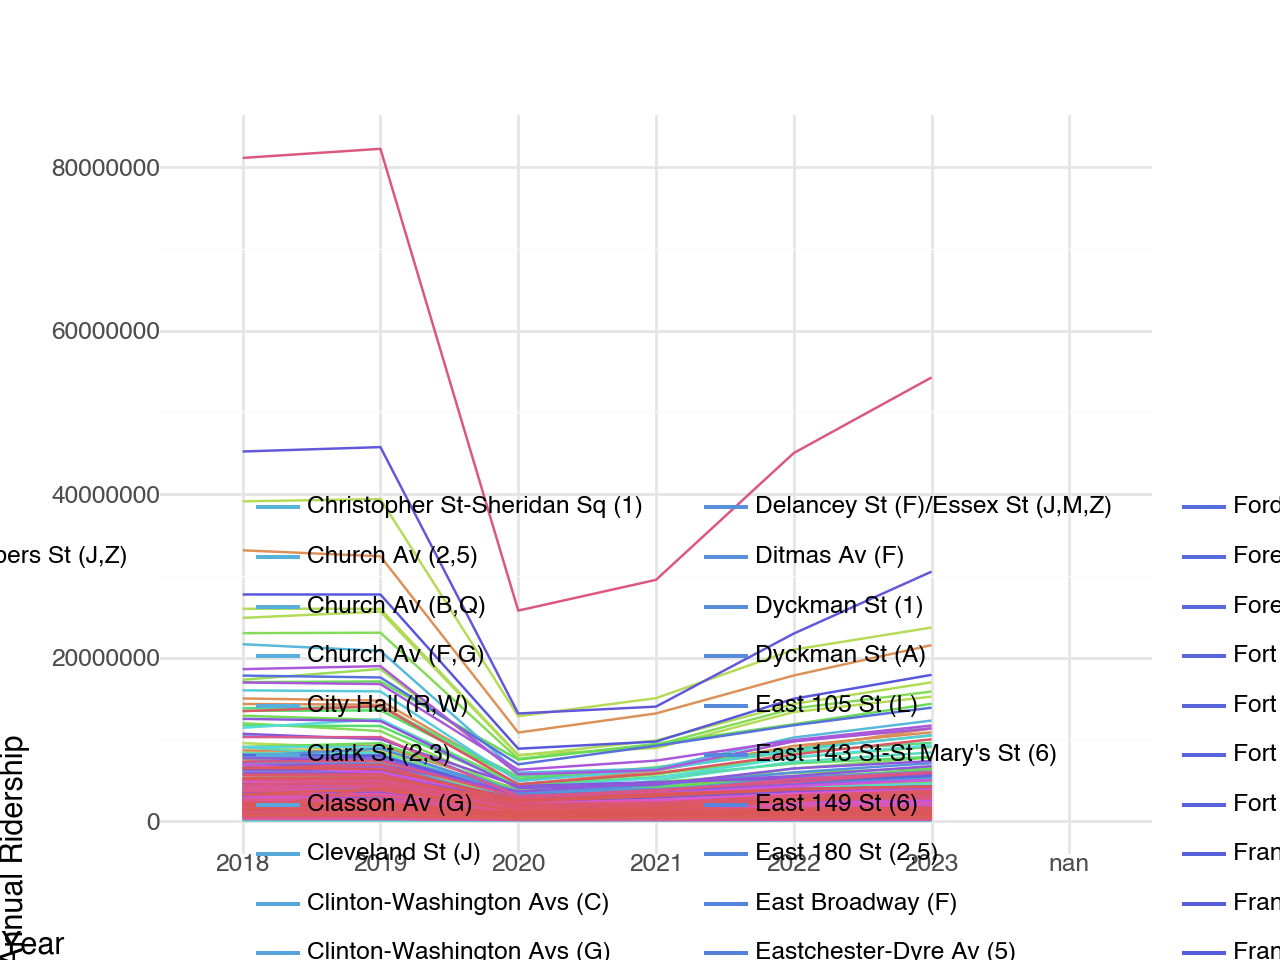

In [ ]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

# Create a line plot using 'merged_df' to visualize ridership trends over years for each station
plot = (
    ggplot(merged_df_cleaned, aes(x='Year_x', y='Annual Ridership', group='Station Name', color='Station Name')) +
    geom_line() +
    labs(
        title='Annual Ridership Trends by Station',
        x='Year',
        y='Annual Ridership',
        color='Station Name'
    ) +
    theme_minimal()
)




/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


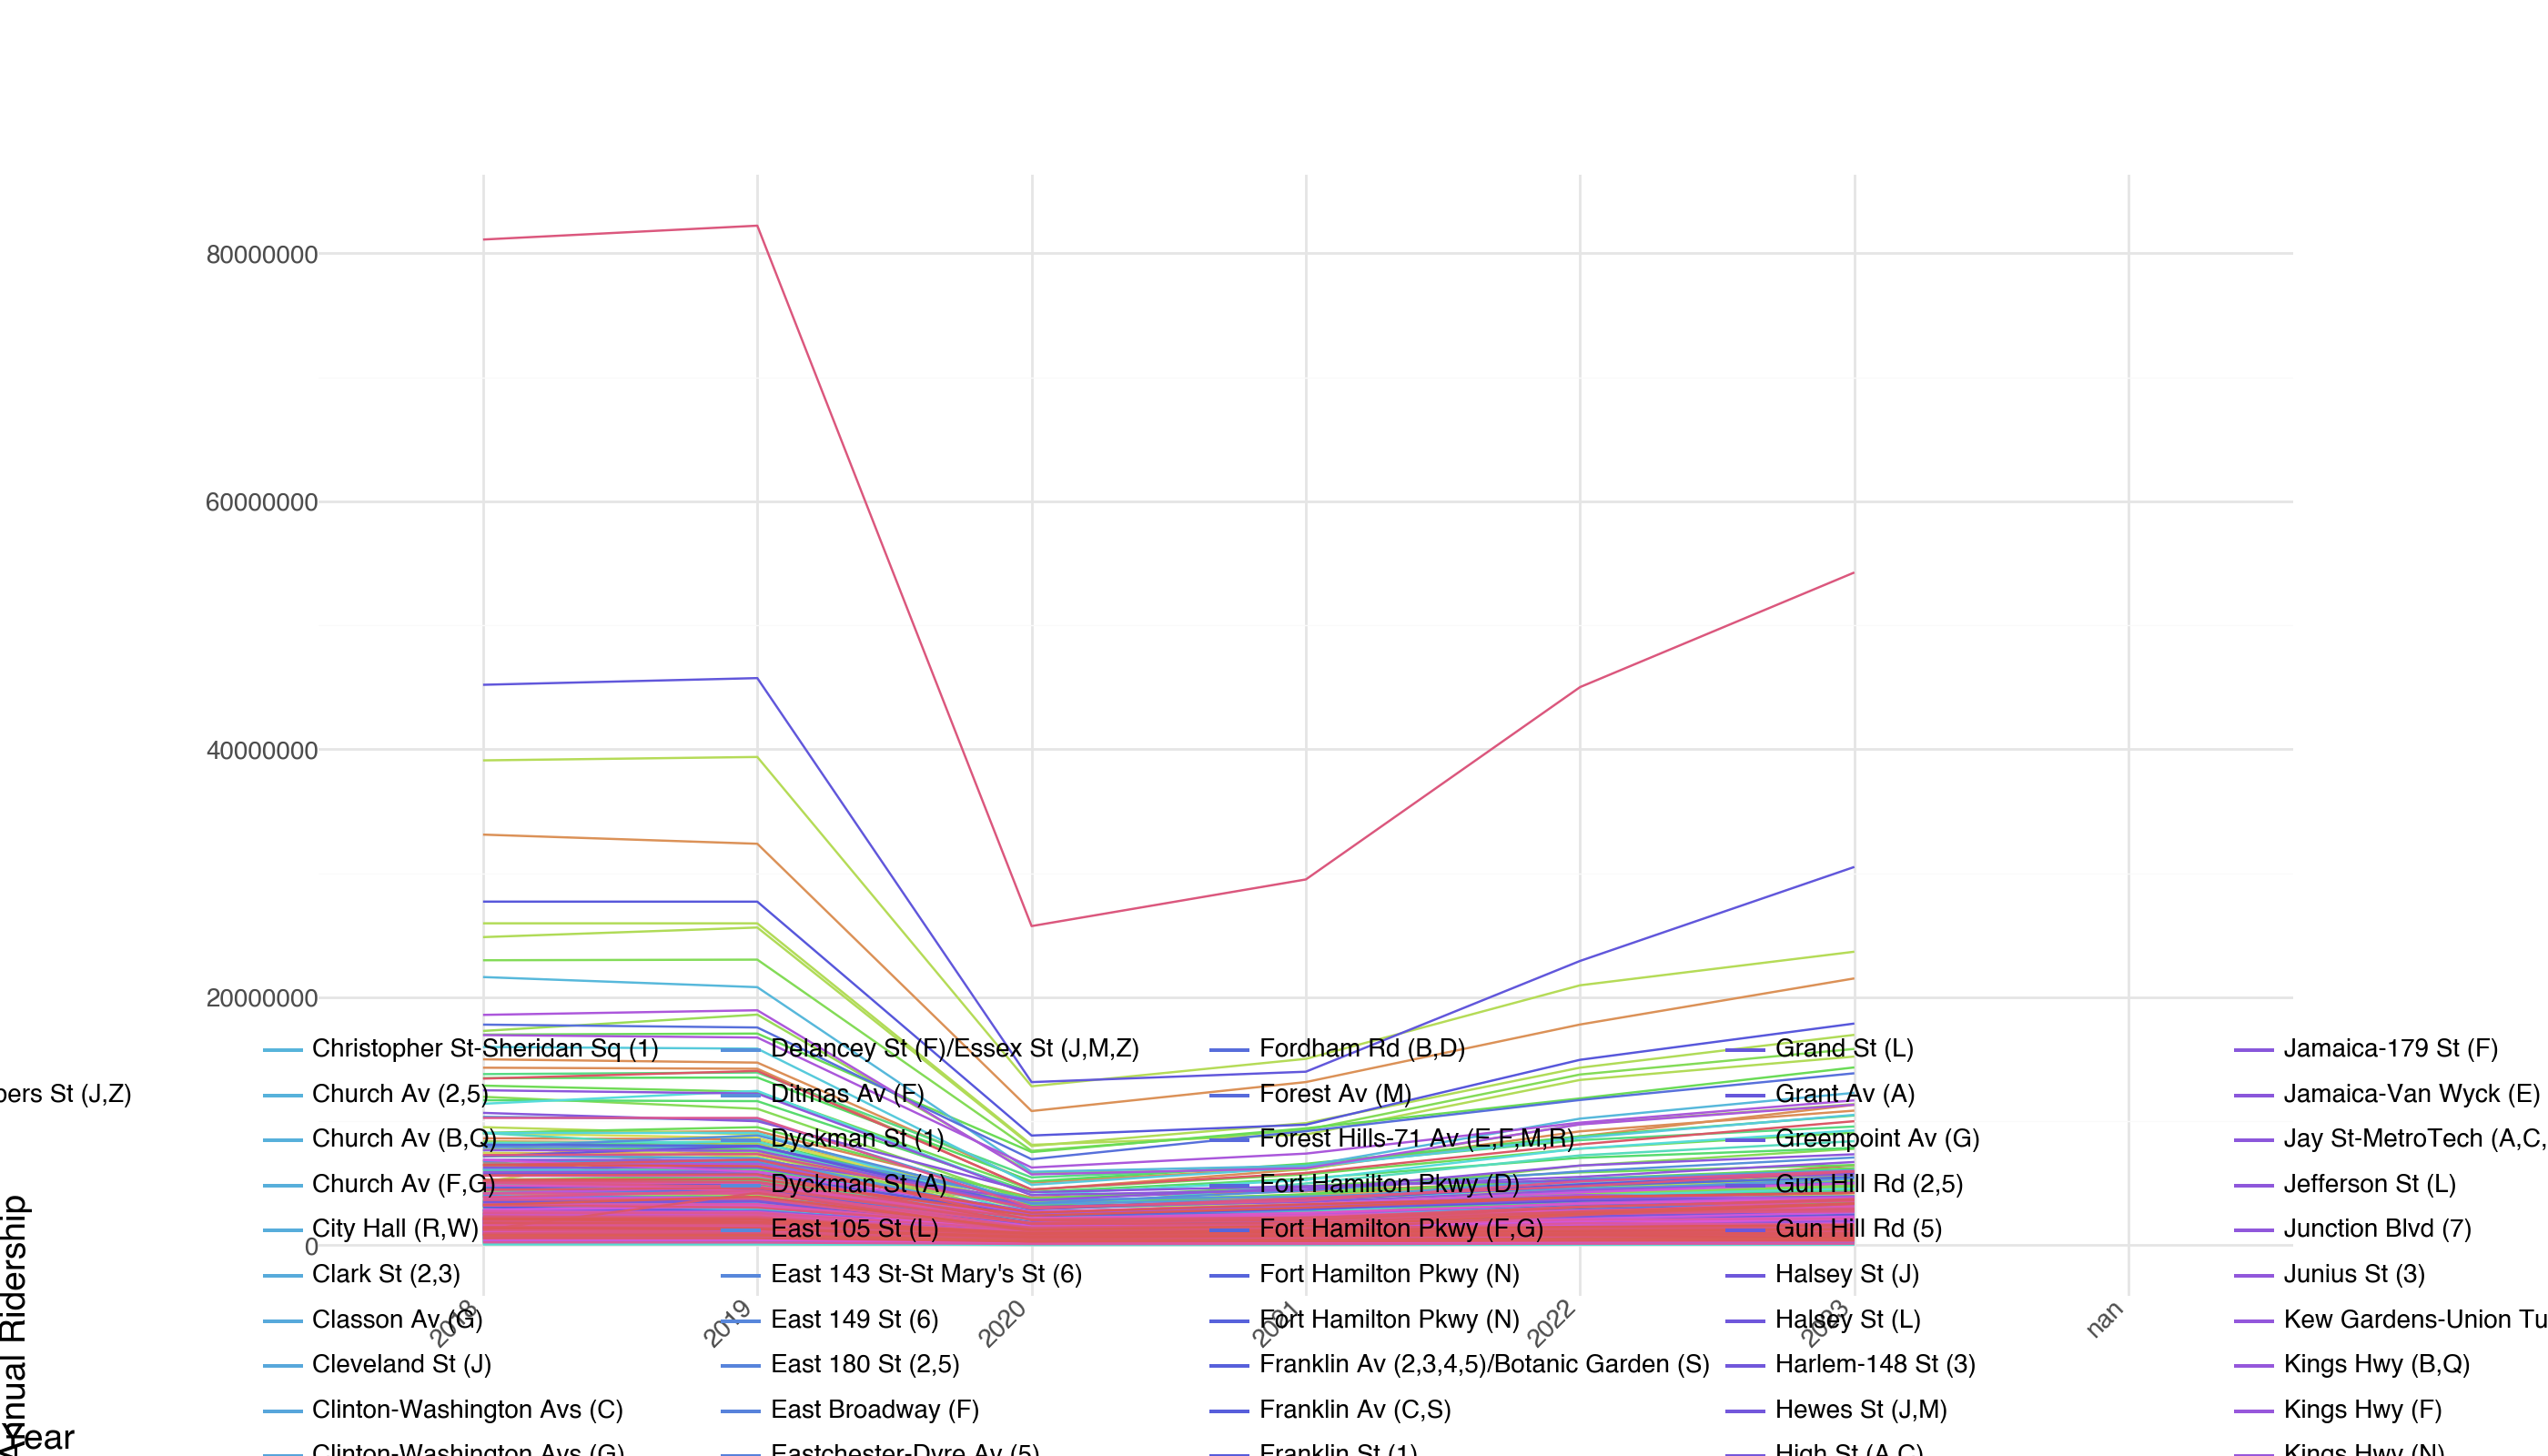

In [ ]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, theme, element_text

# Create a line plot using 'merged_df_cleaned' to visualize ridership trends over years for each station
plot = (
    ggplot(merged_df_cleaned, aes(x='Year_x', y='Annual Ridership', group='Station Name', color='Station Name')) +
    geom_line() +
    labs(
        title='Annual Ridership Trends by Station',
        x='Year',
        y='Annual Ridership',
        color='Station Name'
    ) +
    theme_minimal() +
    theme(
        figure_size=(14, 8),  # Increase the figure size for better readability
        axis_text_x=element_text(rotation=45, ha='right', size=10),  # Rotate x-axis labels for readability
        axis_text_y=element_text(size=10),  # Increase font size for y-axis labels
        legend_position='right',  # Place the legend to the right
        legend_text=element_text(size=10),  # Increase font size of legend text
        title=element_text(size=14)  # Increase the title font size
    )
)




/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 944 rows containing missing values.


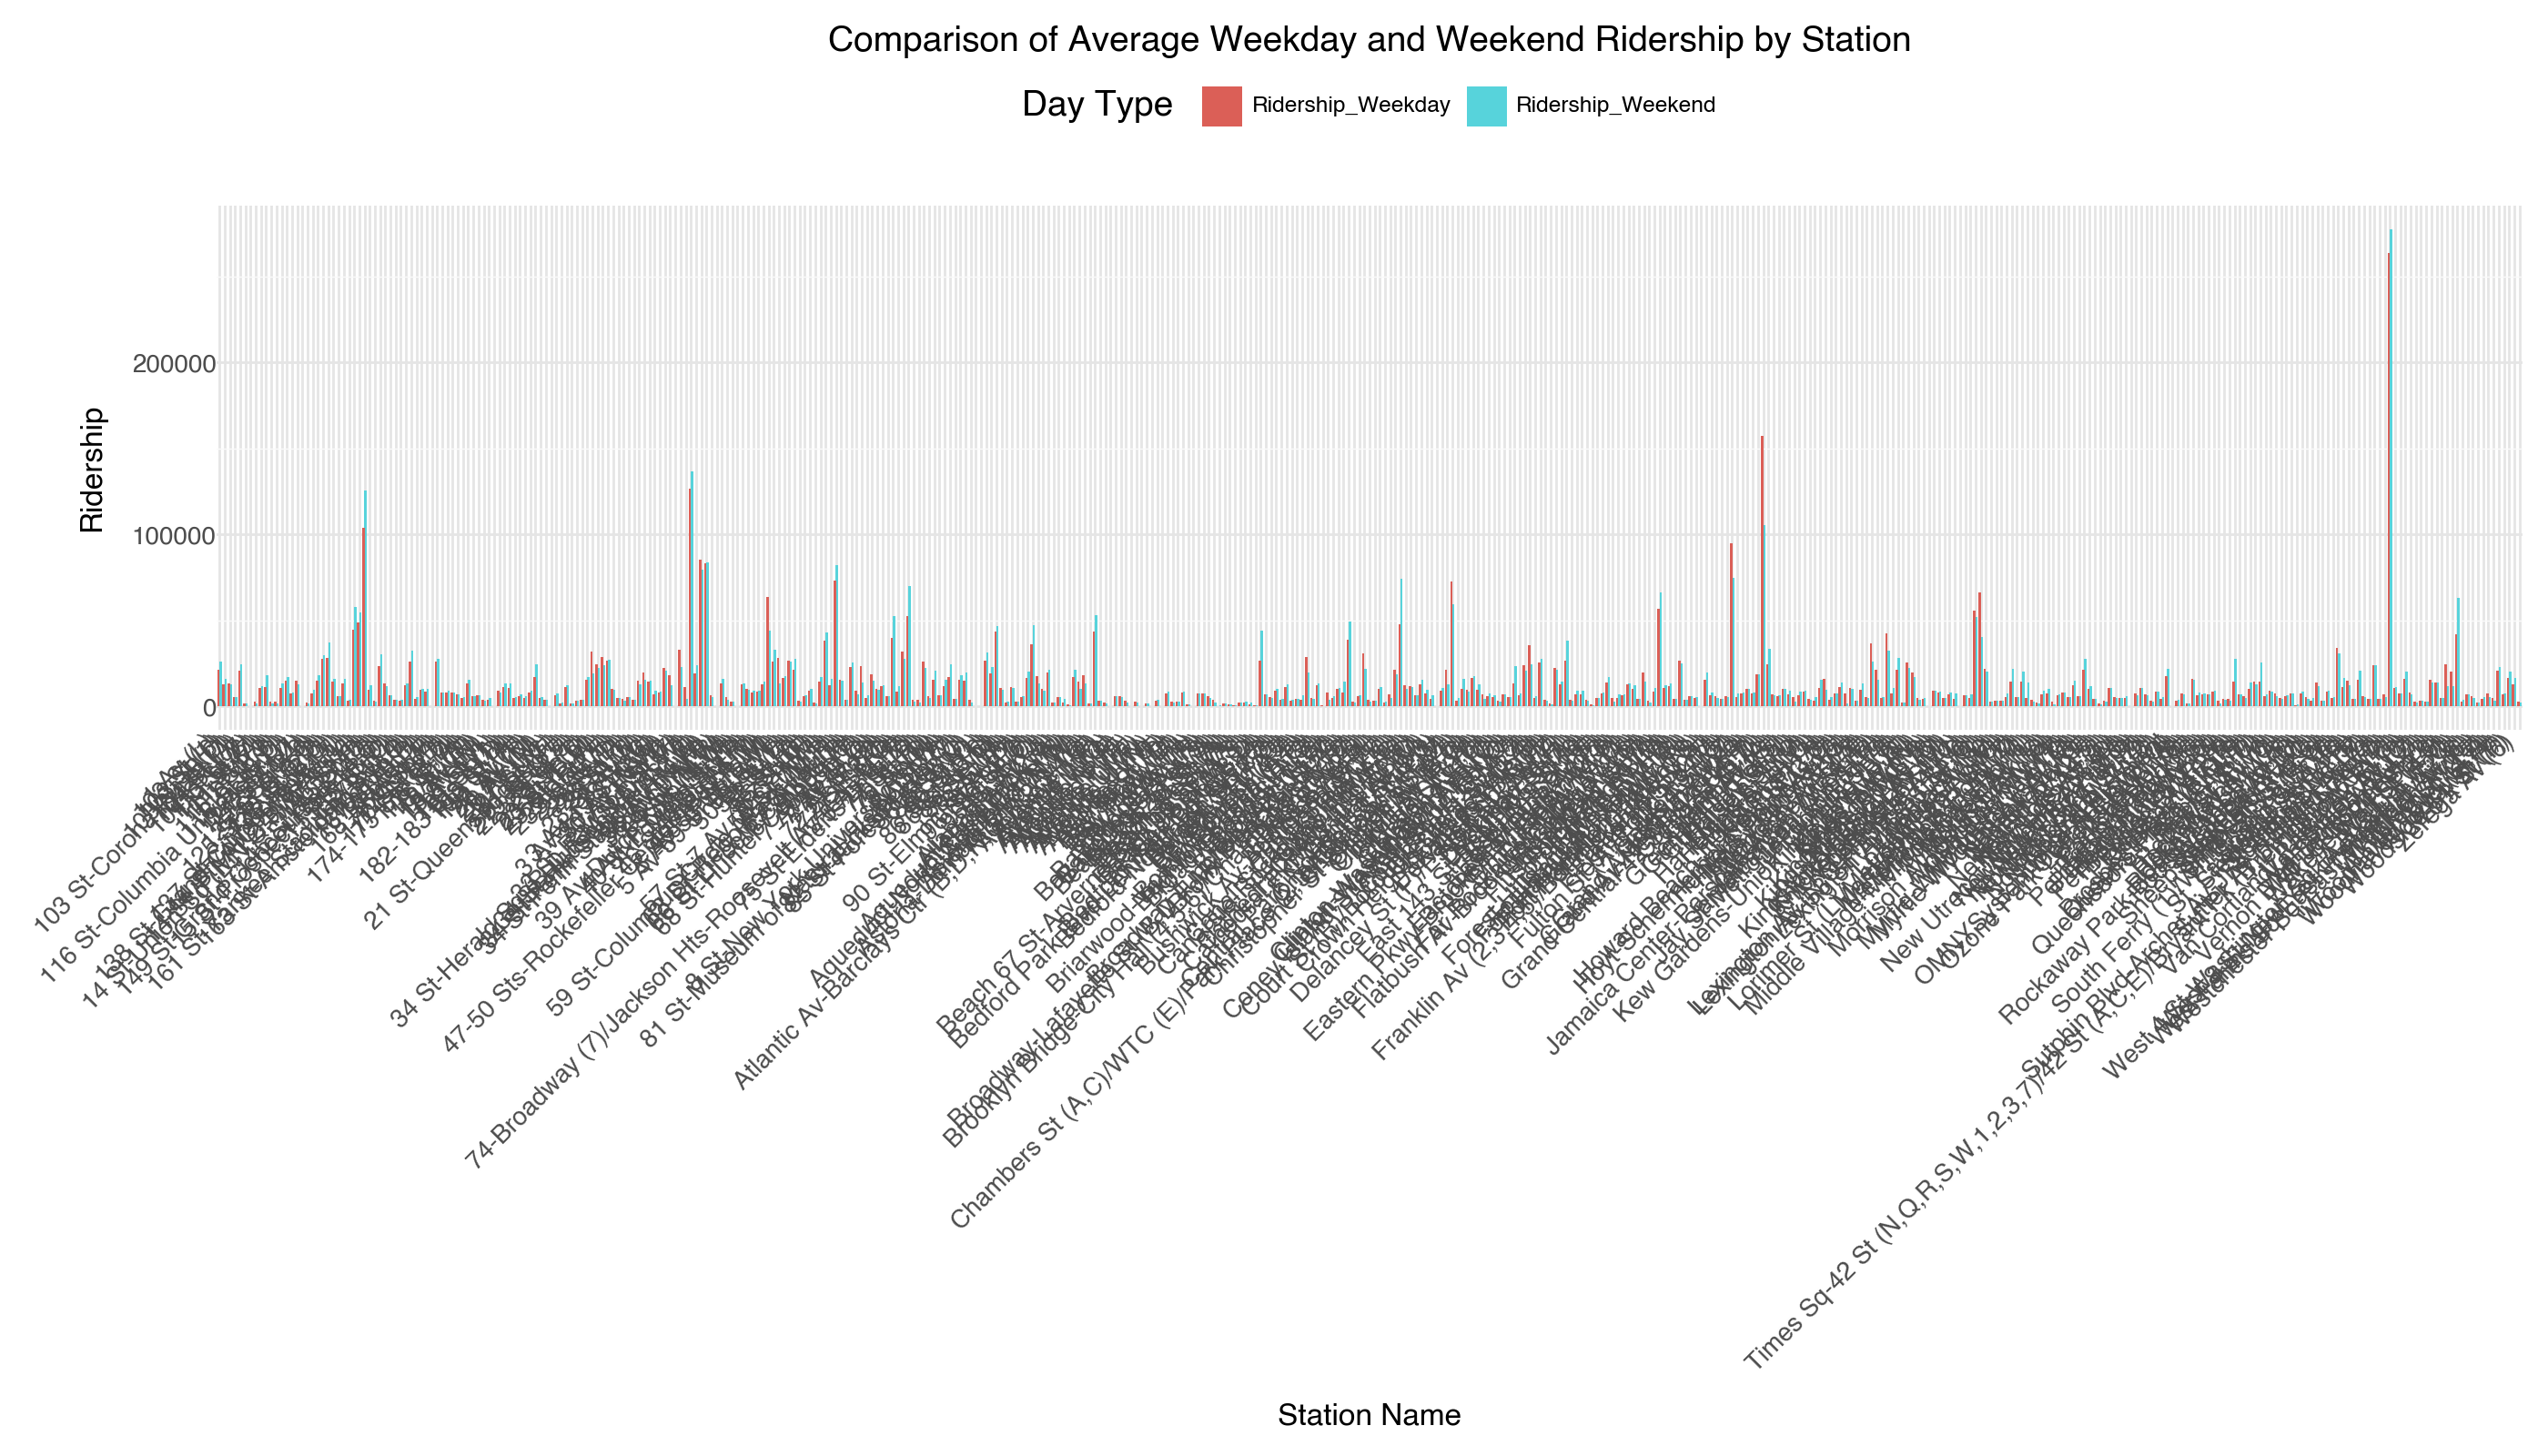

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 944 rows containing missing values.


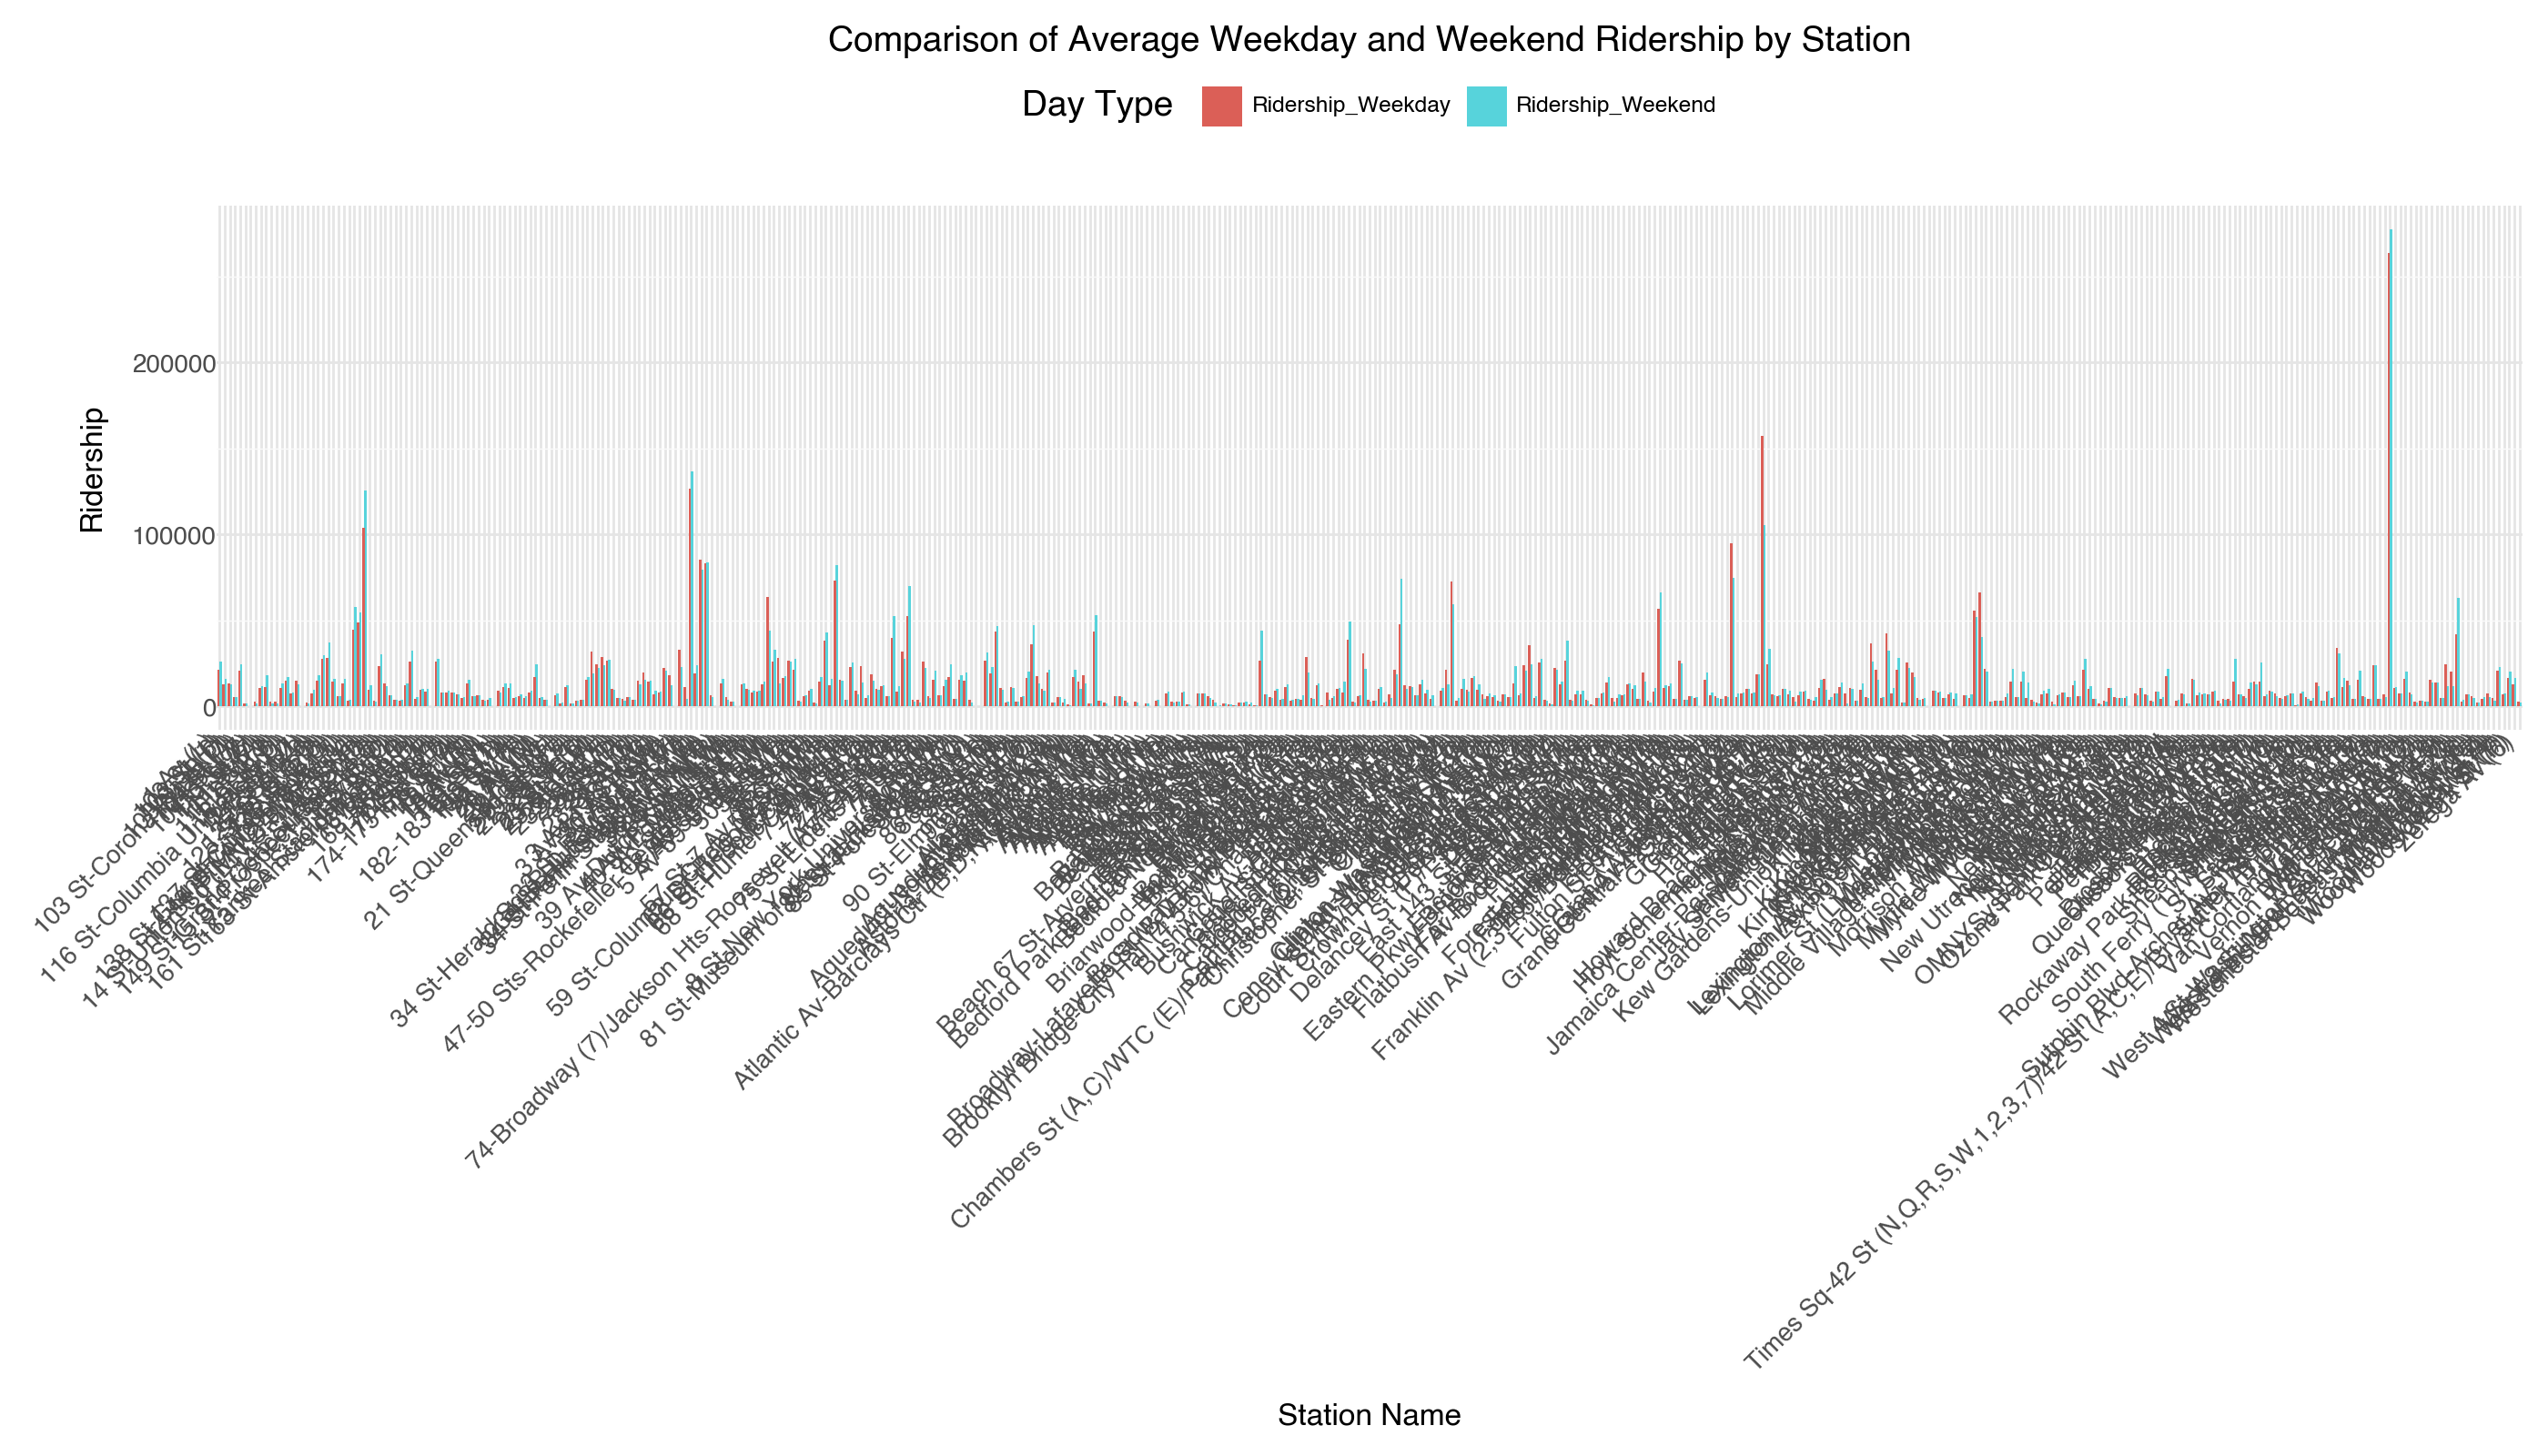

In [ ]:
from plotnine import ggplot, aes, geom_bar, position_dodge, labs, theme_minimal

# Create a tidy dataframe with 'Ridership_Weekday' and 'Ridership_Weekend' as separate columns
weekday_weekend_df = merged_df_cleaned[['Station Name', 'Ridership_Weekday', 'Ridership_Weekend']]

# Reshape the data using pandas melt function to stack the ridership columns
weekday_weekend_df_tidy = weekday_weekend_df.melt(id_vars=['Station Name'],
                                                   value_vars=['Ridership_Weekday', 'Ridership_Weekend'],
                                                   var_name='Day Type',
                                                   value_name='Ridership')

# Create a side-by-side bar plot to compare weekday and weekend ridership
plot = (
    ggplot(weekday_weekend_df_tidy, aes(x='Station Name', y='Ridership', fill='Day Type')) +
    geom_bar(stat='identity', position=position_dodge(width=0.8)) +  # Side-by-side bars
    labs(
        title='Comparison of Average Weekday and Weekend Ridership by Station',
        x='Station Name',
        y='Ridership',
        fill='Day Type'
    ) +
    theme_minimal() +
    theme(
        figure_size=(14, 8),  # Increase the figure size for readability
        axis_text_x=element_text(rotation=45, ha='right', size=10),  # Rotate x-axis labels for readability
        axis_text_y=element_text(size=10),  # Increase font size for y-axis labels
        legend_position='top',  # Place the legend at the top
        title=element_text(size=14),  # Increase the title font size
        axis_title=element_text(size=12)  # Increase font size of axis titles
    )
)

# Display the plot
plot.show()


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 20 rows containing missing values.


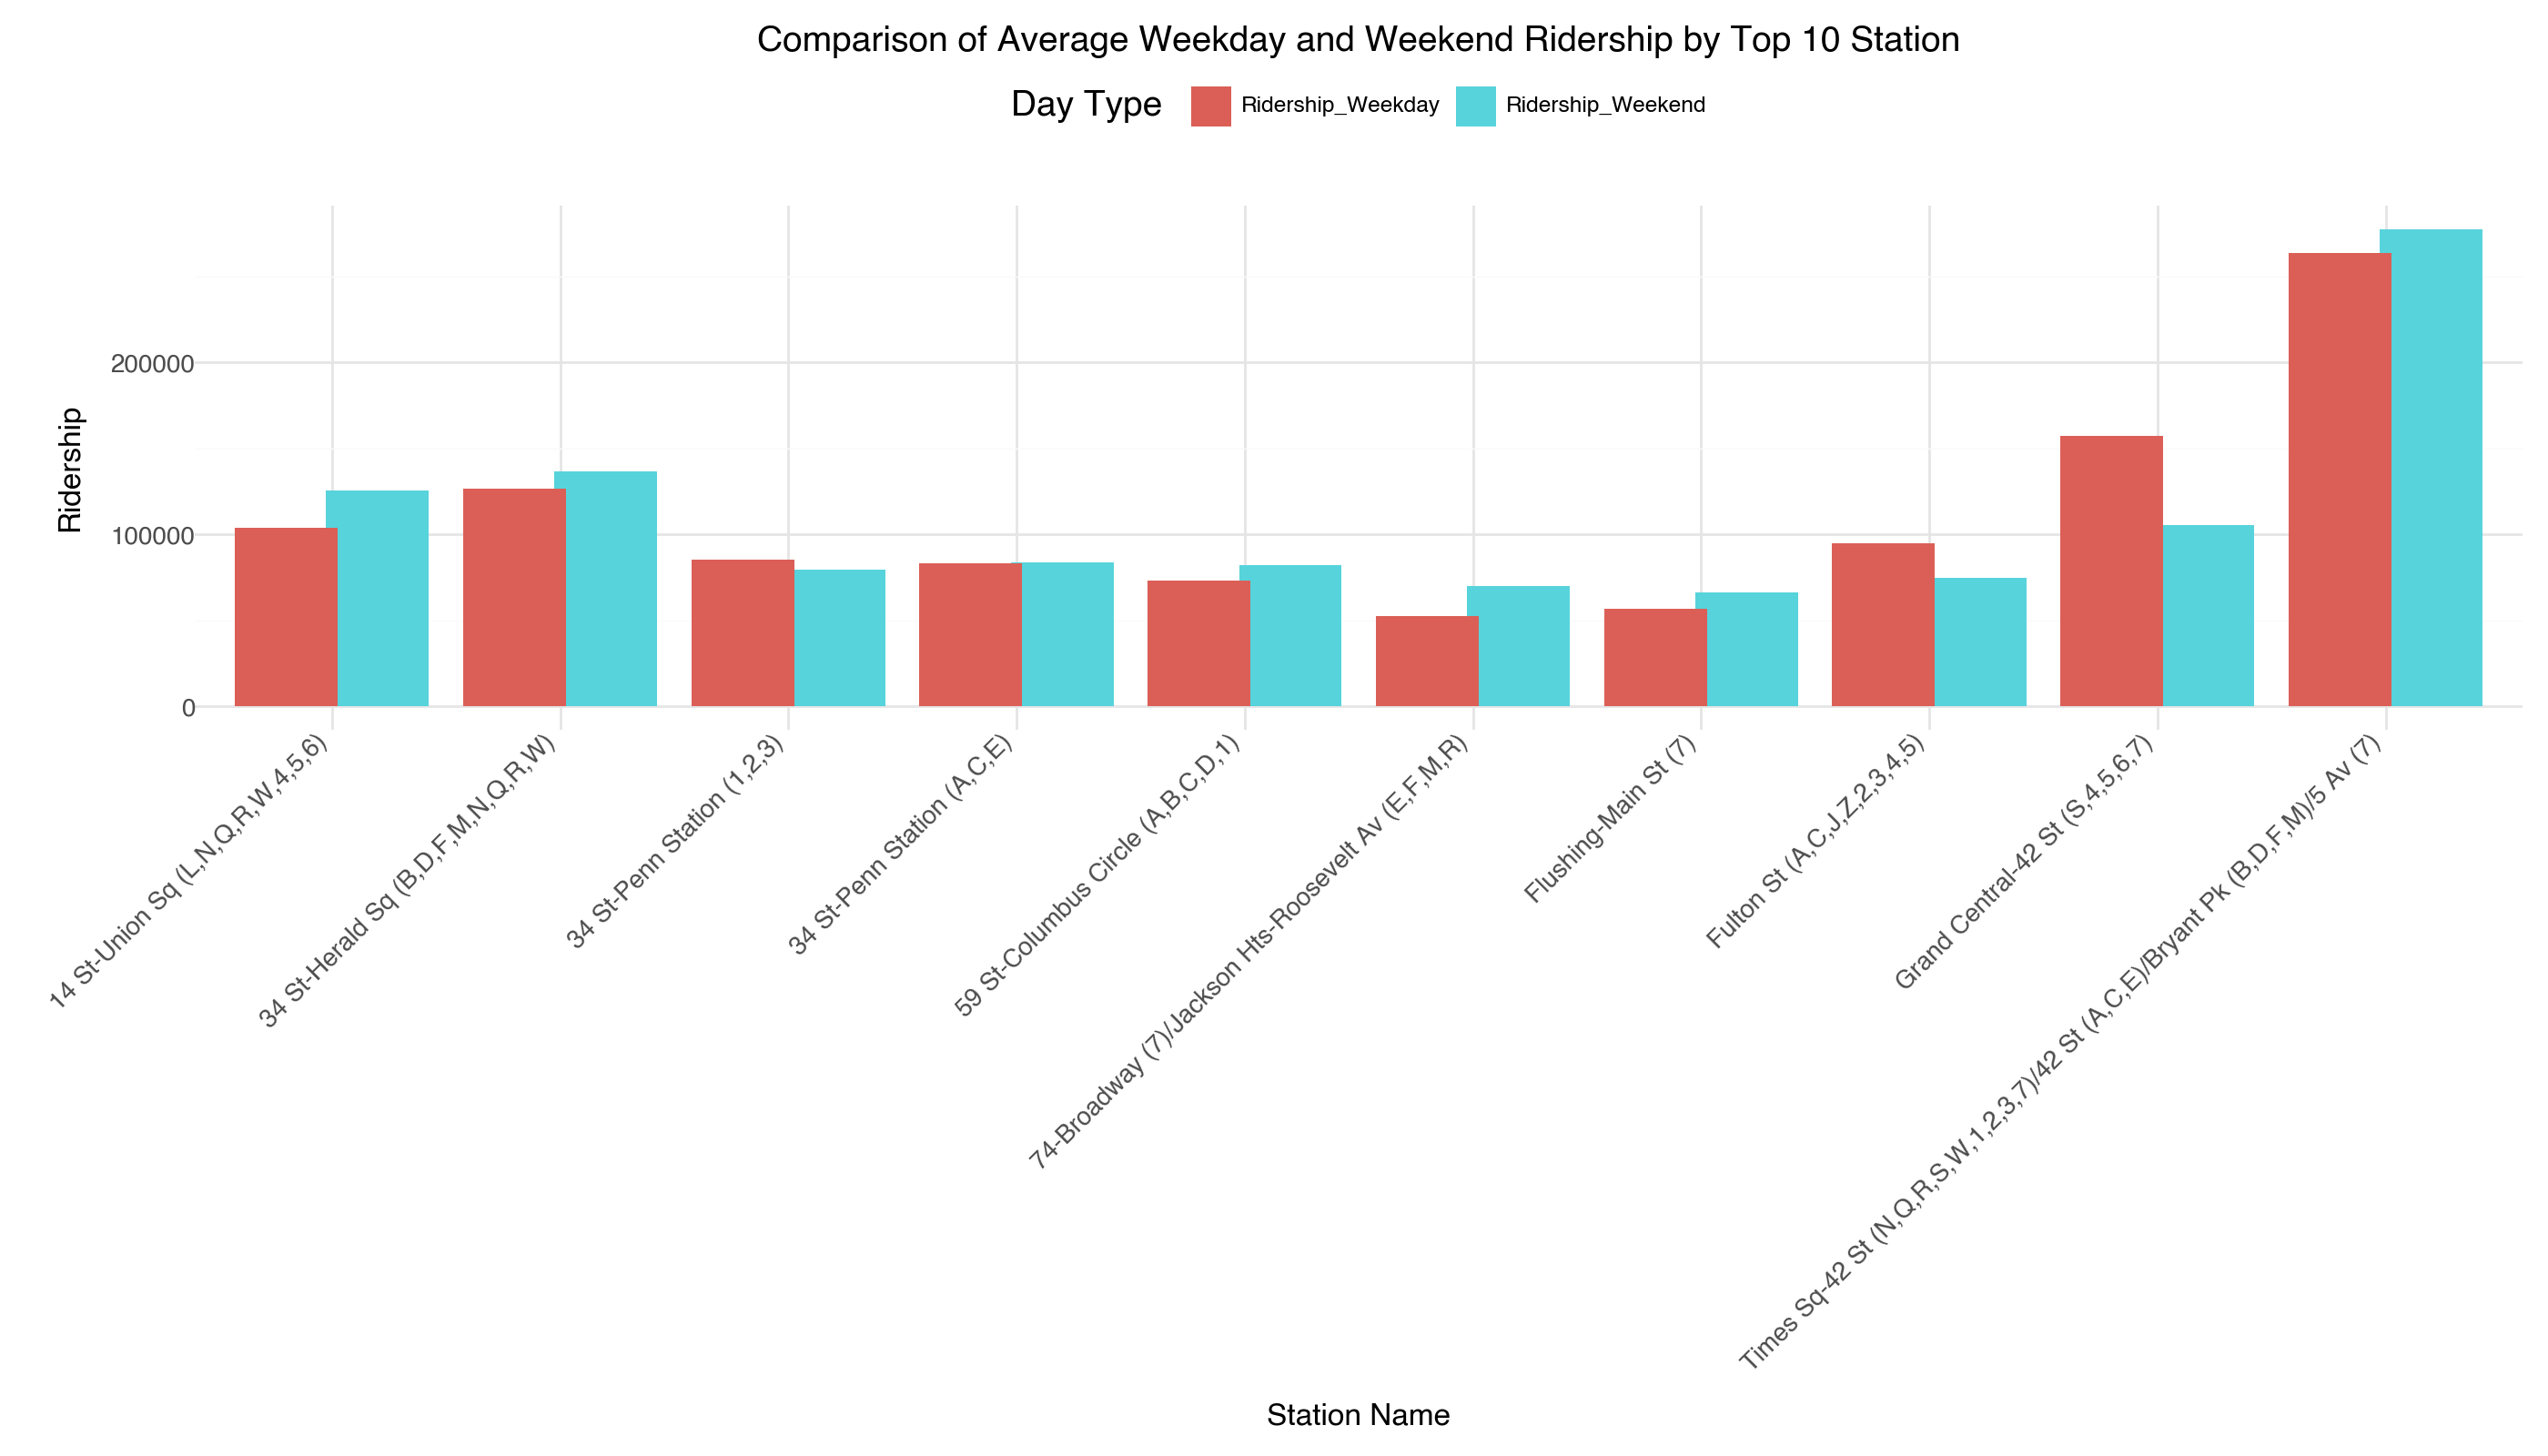

In [ ]:
from plotnine import ggplot, aes, geom_bar, position_dodge, labs, theme_minimal
import pandas as pd

# Sort the dataframe based on 'Ridership' and select the top 10 stations
top_stations = weekday_weekend_df_tidy.groupby('Station Name').agg({'Ridership': 'sum'}).reset_index()
top_stations = top_stations.nlargest(10, 'Ridership')

# Filter the tidy dataframe to include only the top 10 stations
top_stations_df = weekday_weekend_df_tidy[weekday_weekend_df_tidy['Station Name'].isin(top_stations['Station Name'])]

# Create a side-by-side bar plot to compare weekday and weekend ridership for the top 10 stations
plot = (
    ggplot(top_stations_df, aes(x='Station Name', y='Ridership', fill='Day Type')) +
    geom_bar(stat='identity', position=position_dodge(width=0.8)) +  # Side-by-side bars
    labs(
        title='Comparison of Average Weekday and Weekend Ridership by Top 10 Station',
        x='Station Name',
        y='Ridership',
        fill='Day Type'
    ) +
    theme_minimal() +
    theme(
        figure_size=(14, 8),  # Increase the figure size for readability
        axis_text_x=element_text(rotation=45, ha='right', size=10),  # Rotate x-axis labels for readability
        axis_text_y=element_text(size=10),  # Increase font size for y-axis labels
        legend_position='top',  # Place the legend at the top
        title=element_text(size=14),  # Increase the title font size
        axis_title=element_text(size=12)  # Increase font size of axis titles
    )
)

# Display the plot
